In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from time import time
import pickle
import lightgbm as lgb
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import seaborn as sns

/opt/anaconda3/envs/cse6250-project-sleep/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
def show_plots(df):
    plt.figure(figsize=[10, 10])
    plt.subplot(2, 2, 1)
    sns.scatterplot(x=0, y=1, hue='y', data=df)
    plt.subplot(2, 2, 2)
    sns.scatterplot(x=4, y=5, hue='y', data=df)
    plt.subplot(2, 2, 3)
    sns.scatterplot(x=8, y=9, hue='y', data=df)
    plt.subplot(2, 2, 4)
    sns.scatterplot(x=12, y=13, hue='y', data=df)
    plt.show()


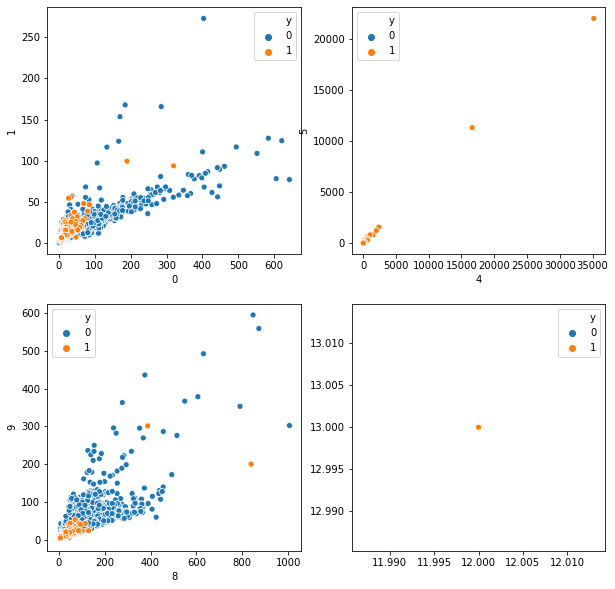

In [5]:
BASE_PATH = '../data'
X, y, _ = pickle.load(open(f'{BASE_PATH}/model_data_v1.sav.bak', 'rb'))

X = X[:, :12]
df = pd.DataFrame(X)
df['y'] = y
df.to_csv(f'{BASE_PATH}/model_data_v1.csv', index=False)

show_plots(df)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

models = [LogisticRegression(),
          RandomForestClassifier(n_estimators=10),
          lgb.LGBMClassifier(learning_rate=0.05, n_estimators=500)]

name_models = ["Logistic Regression",
               "Random Forest",
               "LightGBM"]

eval_metrics = pd.DataFrame(np.empty([len(models) + 1, 4]))
eval_metrics.index = ["baseline"] + name_models
eval_metrics.columns = ["Accuracy", "ROC AUC", "PR AUC", "Log Loss"]

pred = np.repeat(0, len(y_test))
pred_proba = np.repeat(0.5, len(y_test))
eval_metrics.iloc[0, 0] = accuracy_score(y_test, pred)
eval_metrics.iloc[0, 1] = roc_auc_score(y_test, pred_proba)
eval_metrics.iloc[0, 2] = average_precision_score(y_test, pred_proba)
eval_metrics.iloc[0, 3] = log_loss(y_test, pred_proba)

for i, model in enumerate(models):
    tic = time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)
    eval_metrics.iloc[i + 1, 0] = accuracy_score(y_test, pred)
    eval_metrics.iloc[i + 1, 1] = roc_auc_score(y_test, pred_proba[:, 1])
    eval_metrics.iloc[i + 1,
                      2] = average_precision_score(y_test, pred_proba[:, 1])
    eval_metrics.iloc[i + 1, 3] = log_loss(y_test, pred_proba[:, 1])
    print(
        name_models[i] + " took {} seconds to run and predict.".format(round(time() - tic, 3)))

eval_metrics

/opt/anaconda3/envs/cse6250-project-sleep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression took 0.049 seconds to run and predict.
Random Forest took 0.055 seconds to run and predict.
LightGBM took 0.583 seconds to run and predict.


,Accuracy,ROC AUC,PR AUC,Log Loss
baseline,0.917333,0.500000,0.082667,0.693147
Logistic Regression,0.938667,0.956791,0.711425,0.152237
Random Forest,0.954667,0.961339,0.748513,0.225773
LightGBM,0.972444,0.986309,0.902628,0.127968
